# Training a perceptron via scikit-learn

In [17]:
from sklearn import datasets
import numpy as np

### Use the already familiar Iris dataset

In [18]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [19]:
np.unique(y)

array([0, 1, 2])

In [20]:
from sklearn.cross_validation import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Standardize the features using the StandardScaler class

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
from sklearn.linear_model import Perceptron

In [27]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

In [28]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [29]:
y_pred = ppn.predict(X_test_std)

In [30]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [34]:
from plotting import plot_decision_regions

In [35]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

/Users/rayje/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


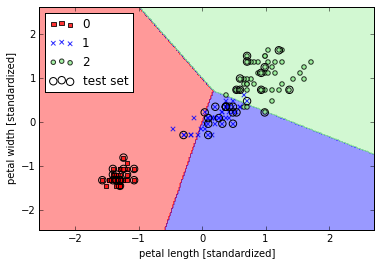

In [36]:
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150),
                      xlab='petal length [standardized]',
                      ylab='petal width [standardized]')

# Logistic Regression
Plot the sigmoid function for some values in the range -7 to 7 to see what it looks like

In [37]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [38]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

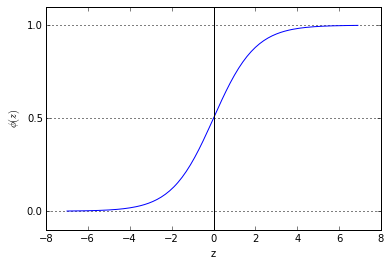

In [39]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

# Training a logistic regression model with scikit-learn

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0)

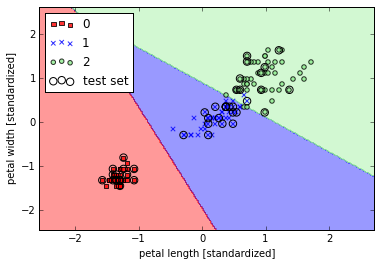

In [42]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150),
                      xlab='petal length [standardized]',
                      ylab='petal width [standardized]')
plt.show()

In [59]:
p = lr.predict_proba(X_test_std[0,:])[0]
print "array([[  %.3f,   %.3f,   %.3f]])" % (p[0], p[1], p[2])

array([[  0.000,   0.063,   0.937]])


In [60]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

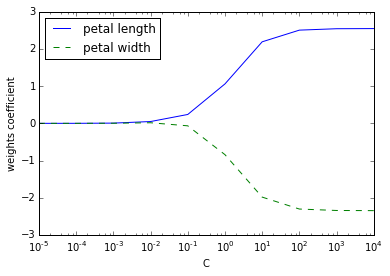

In [61]:
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weights coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Maximum margin classification with support vector machines

In [63]:
from sklearn.svm import SVC

In [64]:
svc = SVC(kernel='linear', C=1.0, random_state=0)
svc.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

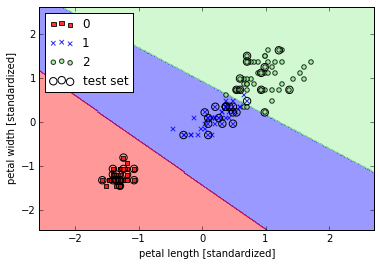

In [65]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svc,
                      test_idx=range(105,150),
                      xlab='petal length [standardized]',
                      ylab='petal width [standardized]')
plt.show()

# Solving nonlinear problems using a kernel SVM

In [67]:
np.random.seed(0)

In [68]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

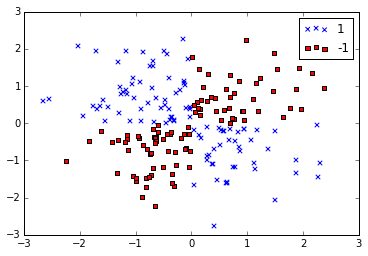

In [70]:
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [71]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.1,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

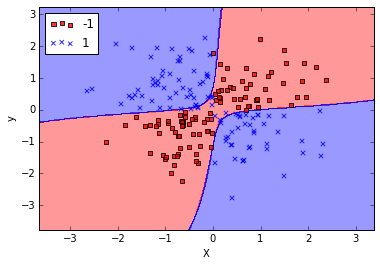

In [72]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.show()

The γ parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere.

### Apply RBF kernel SVM to our Iris flower dataset

In [74]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.2,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

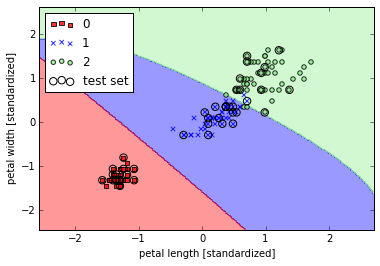

In [75]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150),
                      xlab='petal length [standardized]',
                      ylab='petal width [standardized]')
plt.show()

### Increase the value of γ and observe the effect on the decision boundary

In [76]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=100.0, kernel='rbf', max_iter=-1, probability=False,
  random_state=0, shrinking=True, tol=0.001, verbose=False)

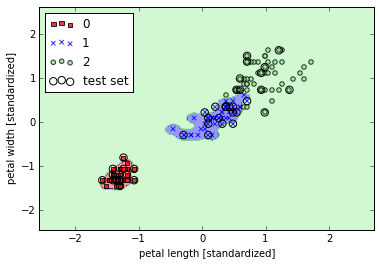

In [77]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150),
                      xlab='petal length [standardized]',
                      ylab='petal width [standardized]')
plt.show()

#### Optimization of γ also plays an important role in controlling overfitting

# Decision tree learning